In [1]:
from numbers import Number
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import onix.models.hyperfine as hyperfine
from IPython.display import display

%matplotlib ipympl

In [2]:
B_field = 270e-4
print(f"B field is set to {B_field / 1e-4:.1f} G")

ground = hyperfine.states["7F0"]
ground._Hamiltonian = ground.H_total(B_field)
print(ground._Hamiltonian )
excited = hyperfine.states["5D0"]
excited._Hamiltonian = excited.H_total(B_field)

B field is set to 270.0 G
Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[-1.07137495e+02+0.00000000e+00j  7.80990542e+01-2.86514807e+01j
   5.23432444e+00+1.97538961e+01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 7.80990542e+01+2.86514807e+01j -9.06851202e+01+0.00000000e+00j
   4.94262696e+01-1.81129724e+01j  7.02258316e+00+2.65026327e+01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 5.23432444e+00-1.97538961e+01j  4.94262696e+01+1.81129724e+01j
  -8.24307781e+01+0.00000000e+00j  6.80748284e-02+1.65782503e-02j
   7.02258316e+00+2.65026327e+01j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  7.02258316e+00-2.65026327e+01j
   6.80748284e-02-1.65782503e-02j -8.23744686e+01+0.00000000e+00j
  -4.92979065e+01+1.81442327e+01j  5.23432444e+00+1.97538961e+01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   7.02258316e+00-2.65

## Zeeman splittings

0.7465226566213865
-0.7460895810503692
0.414556143724526
-0.41389515974240426
0.11167719353581859
-0.11277125308895791


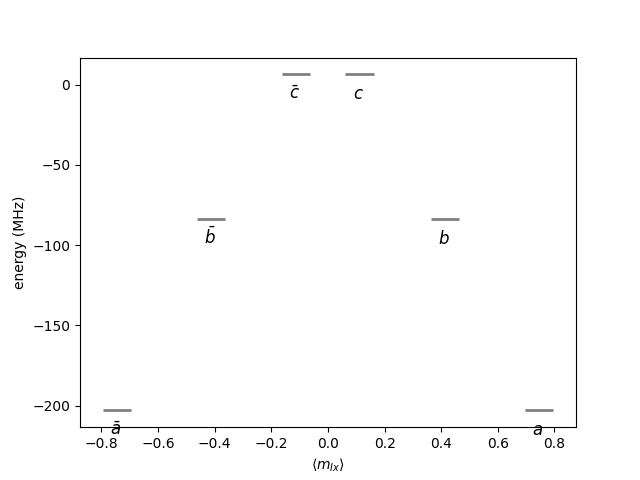

In [12]:
energies_g, states_g = ground.energies_and_eigenstates()

fig, ax = plt.subplots()
ax.set_xlabel(r"$\langle m_{Ix} \rangle$")
ax.set_ylabel("energy (MHz)")

for kk, label in enumerate(hyperfine.state_labels["7F0"]):
    m_Ig = ground.m_Ix(states_g[kk])
    print(m_Ig)
    ax.errorbar(
        m_Ig, energies_g[kk],
        color="gray", fmt='.', markersize=0,
        xerr=0.05, capsize=0, elinewidth=2,
    )
    if "'" in label:
        state_text = "$\\bar{" + label[0] + "}$"
    else:
        state_text = f"${label[0]}$"
    ax.annotate(
        state_text,
        xy=(m_Ig, energies_g[kk]), xycoords="data", xytext=(-5, -18),
        textcoords="offset points", color="k", size=12,
    )

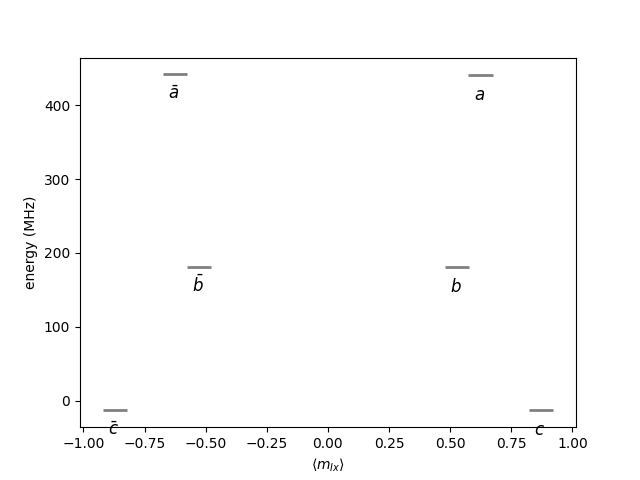

In [4]:
energies_e, states_e = excited.energies_and_eigenstates()

fig, ax = plt.subplots()
ax.set_xlabel(r"$\langle m_{Ix} \rangle$")
ax.set_ylabel("energy (MHz)")

for kk, label in enumerate(hyperfine.state_labels["5D0"]):
    m_Ie = excited.m_Ix(states_e[kk])
    ax.errorbar(
        m_Ie, energies_e[kk],
        color="gray", fmt='.', markersize=0,
        xerr=0.05, capsize=0, elinewidth=2,
    )
    if "'" in label:
        state_text = "$\\bar{" + label[0] + "}$"
    else:
        state_text = f"${label[0]}$"
    ax.annotate(
        state_text,
        xy=(m_Ie, energies_e[kk]), xycoords="data", xytext=(-5, -18),
        textcoords="offset points", color="k", size=12,
    )

### Optical hyperfine probabilities

In [5]:
df = pd.DataFrame(hyperfine.get_optical_hyperfine_probabilities(B_field))
pd.options.display.float_format = "{:.3f}".format
display(df)

,a,a',b,b',c,c'
c,0.856,0.014,0.111,0.004,0.005,0.011
c',0.014,0.856,0.004,0.110,0.011,0.005
b,0.032,0.067,0.396,0.320,0.149,0.036
b',0.067,0.031,0.320,0.396,0.036,0.150
a,0.001,0.031,0.040,0.129,0.322,0.478
a',0.031,0.001,0.129,0.041,0.477,0.321


### Ground M1 matrix elements

In [6]:
M1_elements = ground.m1_elements()
table = {}
for kk, polarization in enumerate(["σ+", "σ-", "π"]):
    for g_state in ground.states:
        table[g_state] = {}
        for g_state_1 in ground.states:
            MHz_per_T_to_kHz_per_G = 1e6 / (1e3 / 1e-4)
            table[g_state][g_state_1] = abs(M1_elements[kk][g_state][g_state_1] * MHz_per_T_to_kHz_per_G)
    print(f"Polarization: {polarization}. Unit: 2π kHz/G.")
    df = pd.DataFrame(table)
    pd.options.display.float_format = "{:.3f}".format
    display(df)
    #print_table(table, ndecimals=3)
    print()

Polarization: σ+. Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.480,0.014,0.227,0.080,0.048,0.039
a',0.014,0.480,0.036,0.086,0.025,0.031
b,0.086,0.080,0.241,0.146,0.212,0.176
b',0.036,0.227,0.146,0.241,0.117,0.122
c,0.031,0.039,0.122,0.176,0.062,0.240
c',0.025,0.048,0.116,0.212,0.240,0.063



Polarization: σ-. Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.480,0.014,0.086,0.036,0.031,0.025
a',0.014,0.480,0.080,0.227,0.039,0.048
b,0.227,0.036,0.241,0.146,0.122,0.116
b',0.080,0.086,0.146,0.241,0.176,0.212
c,0.048,0.025,0.212,0.117,0.062,0.240
c',0.039,0.031,0.176,0.122,0.240,0.063



Polarization: π. Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.152,0.033,0.442,0.112,0.046,0.090
a',0.033,0.151,0.112,0.442,0.090,0.046
b,0.442,0.112,0.168,0.379,0.370,0.174
b',0.112,0.442,0.379,0.167,0.175,0.370
c,0.046,0.090,0.370,0.175,0.141,0.885
c',0.090,0.046,0.174,0.370,0.885,0.142


In [7]:
# x
for g_state in ground.states:
    table[g_state] = {}
    for g_state_1 in ground.states:
        table[g_state][g_state_1] = abs((M1_elements[0][g_state][g_state_1] + M1_elements[1][g_state][g_state_1]) * MHz_per_T_to_kHz_per_G)
print(f"Polarization x Unit: 2π kHz/G.")
df = pd.DataFrame(table)
pd.options.display.float_format = "{:.3f}".format
display(df)

# y
for g_state in ground.states:
    table[g_state] = {}
    for g_state_1 in ground.states:
        table[g_state][g_state_1] = abs(1j*(M1_elements[1][g_state][g_state_1] - M1_elements[0][g_state][g_state_1]) * MHz_per_T_to_kHz_per_G)
print(f"Polarization y Unit: 2π kHz/G.")
df = pd.DataFrame(table)
pd.options.display.float_format = "{:.3f}".format
display(df)

# z
for g_state in ground.states:
    table[g_state] = {}
    for g_state_1 in ground.states:
        table[g_state][g_state_1] = abs(M1_elements[2][g_state][g_state_1] * MHz_per_T_to_kHz_per_G)
print(f"Polarization z Unit: 2π kHz/G.")
df = pd.DataFrame(table)
pd.options.display.float_format = "{:.3f}".format
display(df)

Polarization x Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.524,0.029,0.248,0.045,0.030,0.060
a',0.029,0.525,0.045,0.248,0.060,0.030
b,0.248,0.045,0.180,0.291,0.236,0.129
b',0.045,0.248,0.291,0.180,0.129,0.236
c,0.030,0.060,0.236,0.129,0.034,0.479
c',0.060,0.030,0.129,0.236,0.479,0.033


Polarization y Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.805,0.000,0.236,0.116,0.075,0.025
a',0.000,0.804,0.116,0.237,0.025,0.075
b,0.236,0.116,0.447,0.000,0.253,0.269
b',0.116,0.237,0.000,0.446,0.269,0.253
c,0.075,0.025,0.253,0.269,0.120,0.000
c',0.025,0.075,0.269,0.253,0.000,0.122


Polarization z Unit: 2π kHz/G.


,a,a',b,b',c,c'
a,0.152,0.033,0.442,0.112,0.046,0.090
a',0.033,0.151,0.112,0.442,0.090,0.046
b,0.442,0.112,0.168,0.379,0.370,0.174
b',0.112,0.442,0.379,0.167,0.175,0.370
c,0.046,0.090,0.370,0.175,0.141,0.885
c',0.090,0.046,0.174,0.370,0.885,0.142


## RF Transition Strengths

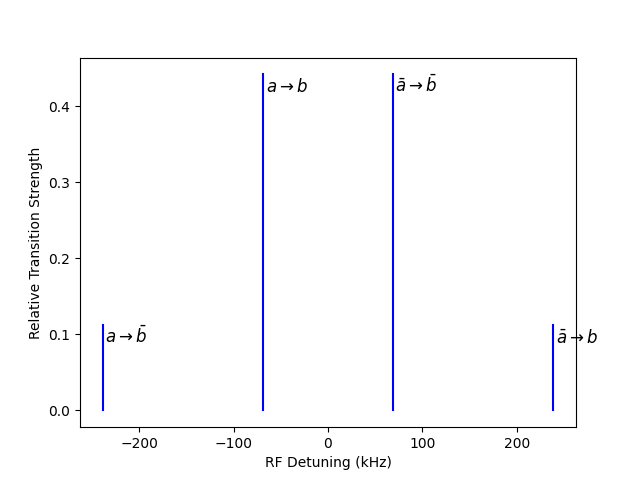

In [8]:
labels = [r"$\bar{a} \to b$", r"$\bar{a} \to \bar{b}$", r"$a \to b$", r"$a \to \bar{b}$"]

abar_b = energies_g[3]-energies_g[0]
abar_bbar = energies_g[2]-energies_g[0]
a_b = energies_g[3]-energies_g[1]
a_bbar = energies_g[2]-energies_g[1]
rf_transition_energies = [abar_b,abar_bbar,a_b,a_bbar]

avg = np.mean(rf_transition_energies)
detunings = []
for i in rf_transition_energies:
    val = (i - avg)*10**3
    detunings.append(val)
    
M1_elements = ground.m1_elements()
abar_b_probability = abs(M1_elements[2]["a'"]["b"] * MHz_per_T_to_kHz_per_G)
abar_bbar_probability = abs(M1_elements[2]["a'"]["b'"] * MHz_per_T_to_kHz_per_G)
a_b_probability = abs(M1_elements[2]["a"]["b"] * MHz_per_T_to_kHz_per_G)
a_bbar_probability = abs(M1_elements[2]["a"]["b'"] * MHz_per_T_to_kHz_per_G)


rf_transition_strengths = [abar_b_probability, abar_bbar_probability, a_b_probability, a_bbar_probability]

fig, ax = plt.subplots()
ax.set_xlabel("RF Detuning (kHz)")
ax.set_ylabel("Relative Transition Strength")

for i in range(0,4):
    ax.plot([detunings[i], detunings[i]], [0,rf_transition_strengths[i]], c = "blue")
    ax.annotate(labels[i], xy = (detunings[i] + 10 ,rf_transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)

## Optical Hyperfine Transition Strengths

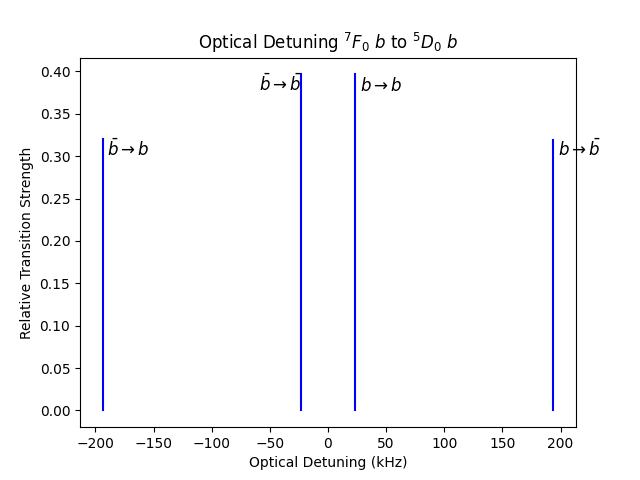

In [9]:
#bb transitions
labels = [r"$b \to b$", r"$b \to \bar{b}$", r"$\bar{b} \to b$", r"$\bar{b} \to \bar{b}$"]

optical_probabilities = hyperfine.get_optical_hyperfine_probabilities(B_field)
b_b = optical_probabilities["b"]["b"]
b_bbar = optical_probabilities["b"]["b'"]
bbar_b = optical_probabilities["b'"]["b"]
bbar_bbar = optical_probabilities["b'"]["b'"]
transition_strengths = [b_b, b_bbar, bbar_b, bbar_bbar]

b_g_energy = energies_g[3]
bbar_g_energy = energies_g[2]
b_e_energy = energies_e[3]
bbar_e_energy = energies_e[2]

transition_energies = [b_e_energy-b_g_energy, b_e_energy-bbar_g_energy, bbar_e_energy-b_g_energy, bbar_e_energy-bbar_g_energy]
avg = np.mean(transition_energies)

detunings = []
for i in transition_energies:
    val = (i - avg)*10**3
    detunings.append(val)

fig, ax = plt.subplots()
ax.set_xlabel("Optical Detuning (kHz)")
ax.set_ylabel("Relative Transition Strength")
ax.set_title(r"Optical Detuning ${}^{7}F_{0}$ $b$ to ${}^{5}D_{0}$ $b$")

for i in range(0,4):
    ax.plot([detunings[i], detunings[i]], [0,transition_strengths[i]], c = "blue")
    if i ==3:
        ax.annotate(labels[i], xy = (detunings[i] - 30 ,transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)
    else:
        ax.annotate(labels[i], xy = (detunings[i] + 10 ,transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)

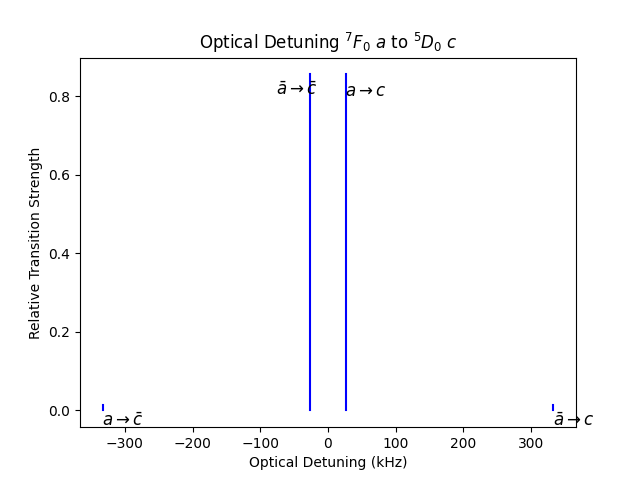

In [10]:
#ac transitions
labels = [r"$a \to c$", r"$a \to \bar{c}$", r"$\bar{a} \to c$", r"$\bar{a} \to \bar{c}$"]

optical_probabilities = hyperfine.get_optical_hyperfine_probabilities(B_field)
a_c = optical_probabilities["a"]["c"]
a_cbar = optical_probabilities["a"]["c'"]
abar_c = optical_probabilities["a'"]["c"]
abar_cbar = optical_probabilities["a'"]["c'"]
transition_strengths = [a_c, a_cbar, abar_c, abar_cbar]

a_g_energy = energies_g[1]
abar_g_energy = energies_g[0]
c_e_energy = energies_e[1]
cbar_e_energy = energies_e[0]

transition_energies = [c_e_energy-a_g_energy, cbar_e_energy-a_g_energy, c_e_energy-abar_g_energy, cbar_e_energy-abar_g_energy]
avg = np.mean(transition_energies)

detunings = []
for i in transition_energies:
    val = (i - avg)*10**3
    detunings.append(val)

fig, ax = plt.subplots()
ax.set_xlabel("Optical Detuning (kHz)")
ax.set_ylabel("Relative Transition Strength")
ax.set_title(r"Optical Detuning ${}^{7}F_{0}$ $a$ to ${}^{5}D_{0}$ $c$")

for i in range(0,4):
    ax.plot([detunings[i], detunings[i]], [0,transition_strengths[i]], c = "blue")
    if i ==3:
        ax.annotate(labels[i], xy = (detunings[i] - 40 ,transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)
    else:
        ax.annotate(labels[i], xy = (detunings[i] + 10 ,transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)

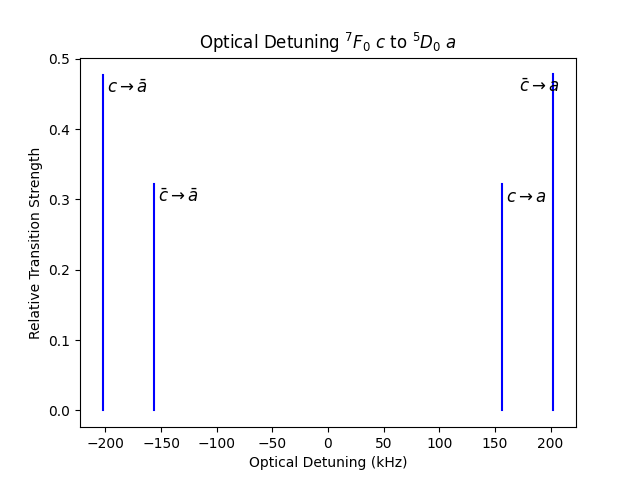

In [11]:
#ca transitions
labels = [r"$c \to a$", r"$c \to \bar{a}$", r"$\bar{c} \to a$", r"$\bar{c} \to \bar{a}$"]

optical_probabilities = hyperfine.get_optical_hyperfine_probabilities(B_field)
c_a = optical_probabilities["c"]["a"]
c_abar = optical_probabilities["c"]["a'"]
cbar_a = optical_probabilities["c'"]["a"]
cbar_abar = optical_probabilities["c'"]["a'"]
transition_strengths = [c_a, c_abar, cbar_a, cbar_abar]

c_g_energy = energies_g[5]
cbar_g_energy = energies_g[4]
a_e_energy = energies_e[1]
abar_e_energy = energies_e[0]

transition_energies = [a_e_energy-c_g_energy, abar_e_energy-c_g_energy, a_e_energy-cbar_g_energy, abar_e_energy-cbar_g_energy]
avg = np.mean(transition_energies)

detunings = []
for i in transition_energies:
    val = (i - avg)*10**3
    detunings.append(val)

fig, ax = plt.subplots()
ax.set_xlabel("Optical Detuning (kHz)")
ax.set_ylabel("Relative Transition Strength")
ax.set_title(r"Optical Detuning ${}^{7}F_{0}$ $c$ to ${}^{5}D_{0}$ $a$")

for i in range(0,4):
    ax.plot([detunings[i], detunings[i]], [0,transition_strengths[i]], c = "blue")
    if i==2:
        ax.annotate(labels[i], xy = (detunings[i] - 25 ,transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)
    else:
        ax.annotate(labels[i], xy = (detunings[i] + 10 ,transition_strengths[i] + 0.01), xycoords="data", xytext=(-5, -18),textcoords="offset points", color="k", size=12,)

## Schiff moment sensitivities

These numbers are likely incorrect. Double check the calculations in the `hyperfine` module.

In [46]:
table = {}
energies, eigenstates = ground.energies_and_eigenstates()
for kk in range(len(ground.states)):
    state = ground.states[kk]
    table[state] = {
        "Schiff sensitivity along D1": ground.Schiff_moment_sensitivity(eigenstates[kk])[0],
        "Schiff sensitivity along D2": ground.Schiff_moment_sensitivity(eigenstates[kk])[1],
    }
print("7F0 Schiff moment sensitivities:")
df = pd.DataFrame(table)
pd.options.display.float_format = "{:.3f}".format
display(df)

7F0 Schiff moment sensitivities:


,a,a',b,b',c,c'
Schiff sensitivity along D1,-0.592,0.592,-0.174,0.174,0.674,-0.673
Schiff sensitivity along D2,-0.384,0.385,-0.015,0.016,-0.015,0.014
